# Used Libraries

In [2]:
from PIL import Image
from IPython.display import display
import graphviz

# DFA Minimization Code

In [3]:
def are_states_equivalent(state1, state2, dfa):
    for symbol in dfa[state1]:
        next_state1 = dfa[state1][symbol]
        next_state2 = dfa[state2][symbol]

        if next_state1 != next_state2:
            return False

    return True

In [4]:
def merge_equivalent_states(partition, dfa):
    merged_dfa = {}
    new_states_mapping = {}

    for group in partition:
        representative_state = group[0]
        for state in group:
            new_states_mapping[state] = representative_state
        merged_dfa[representative_state] = {}

    for state in dfa:
        for symbol in dfa[state]:
            next_state = dfa[state][symbol]
            merged_dfa[new_states_mapping[state]][symbol] = new_states_mapping[next_state]

    return merged_dfa

In [5]:
def split_equivalent_states(states, dfa):
    split_groups = []
    state1 = states[0]

    for state2 in states[1:]:
        if not are_states_equivalent(state1, state2, dfa):
            split_groups.append([state1, state2])
        else:
            split_groups.append([state1])
            split_groups.append([state2])

    return split_groups

In [14]:
def minimize_dfa(dfa, final_states):
    non_final_states = [state for state in dfa.keys() if state not in final_states]
    partition = [final_states, non_final_states]

    while True:
        new_partition = []

        for group in partition:
            if len(group) > 1:
                split_groups = split_equivalent_states(group, dfa)

                new_partition.extend(split_groups)
            else:
                new_partition.append(group)

        if len(new_partition) == len(partition):
            break

        partition = new_partition

    minimized_dfa = merge_equivalent_states(partition, dfa)

    return minimized_dfa

# Output Formats

In [7]:

def plot_dfa(dfa, final_states, start_state, title):
    dot = graphviz.Digraph(comment=title, format='png')
    
    for state in dfa:
        if state == start_state:
            dot.node(state, shape='circle', color='red', style='filled')
        if state in final_states:
            dot.node(state, shape='doublecircle')
        else:
            dot.node(state, shape='circle')
    
    for state in dfa:
        for symbol, next_state in dfa[state].items():
            dot.edge(state, next_state, label=symbol)
    
    dot.render(filename=f"{title}_dfa", format='png', cleanup=True)
    print(f"{title}.")

In [8]:
def print_dfa(dfa, start_state, final_states):
    alphabet_symbols = sorted(set(symbol for transitions in dfa.values() for symbol in transitions.keys()))
    
    print("State\t" + "\t".join(alphabet_symbols))
    
    for state, transitions in dfa.items():
        start_marker = '→' if state == start_state else ''
        final_marker = '*' if state in final_states else ''
        transitions_str = "\t".join(transitions.get(symbol, '') for symbol in alphabet_symbols)
        print(f"{start_marker}{state}{final_marker}\t{transitions_str}")



# Examples 

Original DFA:
State	a	b
→q0	q1	q0
q1*	q2	q1
q2*	q1	q2

Minimized DFA:
State	a	b
q1*	q1	q1
→q0	q1	q0


Original.


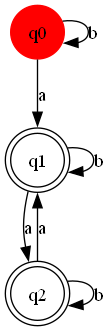

Minimized.


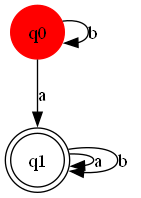

In [15]:
dfa_example = {
    'q0': {'a': 'q1', 'b': 'q0'},
    'q1': {'a': 'q2', 'b': 'q1'},
    'q2': {'a': 'q1', 'b': 'q2'}
}

start_state_example = 'q0'
final_states_example = ['q1', 'q2']

minimized_dfa_example = minimize_dfa(dfa_example, final_states_example)

print("Original DFA:")
print_dfa(dfa_example, start_state_example,final_states_example)
print("\nMinimized DFA:")
print_dfa(minimized_dfa_example, start_state_example,final_states_example)
print("\n")
plot_dfa(dfa_example,final_states_example,start_state_example, "Original")
image = Image.open("Original_dfa.png")
display(image)

plot_dfa(minimized_dfa_example,final_states_example,start_state_example, "Minimized")
image = Image.open("Minimized_dfa.png")
display(image)

Original DFA:
State	a	b
→q0	q1	q2
q1	q1	q3
q2	q1	q2
q3	q1	q4
q4*	q1	q2

Minimized DFA:
State	a	b
q4*	q0	q2
→q0	q0	q4
q2	q0	q2


Original.


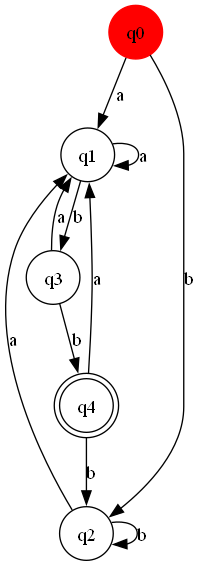

Minimized.


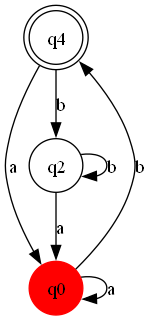

In [10]:

dfa_example = {
    'q0': {'a': 'q1', 'b': 'q2'},
    'q1': {'a': 'q1', 'b': 'q3'},
    'q2': {'a': 'q1', 'b': 'q2'},
    'q3': {'a': 'q1', 'b': 'q4'},
    'q4': {'a': 'q1', 'b': 'q2'}
}

final_states_example = ['q4']
start_state_example = 'q0'



minimized_dfa_example = minimize_dfa(dfa_example, final_states_example)

print("Original DFA:")
print_dfa(dfa_example, start_state_example,final_states_example)
print("\nMinimized DFA:")
print_dfa(minimized_dfa_example, start_state_example,final_states_example)
print("\n")
plot_dfa(dfa_example,final_states_example,start_state_example, "Original")
image = Image.open("Original_dfa.png")
display(image)

plot_dfa(minimized_dfa_example,final_states_example,start_state_example, "Minimized")
image = Image.open("Minimized_dfa.png")
display(image)

Original DFA:
State	0	1
→q0*	q1	q2
q1	q2	q0
q2	q0	q1

Minimized DFA:
State	0	1
→q0*	q1	q1
q1	q0	q1


Original.


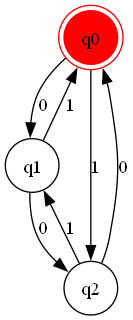

Minimized.


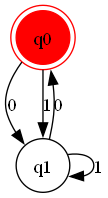

In [11]:
dfa_example = {
    'q0': {'0': 'q1', '1': 'q2'},
    'q1': {'0': 'q2', '1': 'q0'},
    'q2': {'0': 'q0', '1': 'q1'}
}

final_states_example = ['q0']
start_state_example ='q0'

minimized_dfa_example = minimize_dfa(dfa_example, final_states_example)

print("Original DFA:")
print_dfa(dfa_example, start_state_example,final_states_example)
print("\nMinimized DFA:")
print_dfa(minimized_dfa_example, start_state_example,final_states_example)
print("\n")
plot_dfa(dfa_example,final_states_example,start_state_example, "Original")
image = Image.open("Original_dfa.png")
display(image)

plot_dfa(minimized_dfa_example,final_states_example,start_state_example, "Minimized")
image = Image.open("Minimized_dfa.png")
display(image)